In [1]:
# Hui (Henry) Chen
# CSCI 415 - M01/ Fall 2020
# Project Part III
# Airbnb Open Data (NYC)

In [2]:
# config matplotlib display
%matplotlib notebook

import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [3]:
# config matplotlib style
plt.style.use('seaborn')

# initial val
DATASET_URL = "http://data.insideairbnb.com/united-states/ny/new-york-city/2020-10-05/visualisations/listings.csv"
DATASET = ""
DATASET_LOCAL = "./dataset/listings.csv"

In [4]:
def getDataSet():
    global DATASET

    # get the dataset file name
    fields = DATASET_URL.split("/")
    DATASET = str(fields[-1:][0])
    
    # download the dataset from the URL
    r = requests.get(DATASET_URL, allow_redirects=True)
    open(DATASET, 'wb').write(r.content)

In [5]:
# download the dataset remotely
# getDataSet()

df = pd.read_csv(DATASET_LOCAL)

In [6]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.36,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,76,1,354,2020-09-20,4.82,1,2
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.36,1,2
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,175,7,1,2014-01-02,0.01,1,359
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,73,2,473,2020-03-15,3.40,1,350
5,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.87,1,0
6,5552,Spacious river view in the West Village,8380,Maria,Manhattan,West Village,40.73552,-74.01042,Entire home/apt,160,3,66,2019-08-10,0.48,1,125
7,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,82,4,181,2020-09-09,1.30,3,0
8,6021,Wonderful Guest Bedroom in Manhattan CENTRAL PARK,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,123,2019-12-09,0.89,1,365
9,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,109,30,181,2020-03-16,1.31,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44666 entries, 0 to 44665
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              44666 non-null  int64  
 1   name                            44650 non-null  object 
 2   host_id                         44666 non-null  int64  
 3   host_name                       44649 non-null  object 
 4   neighbourhood_group             44666 non-null  object 
 5   neighbourhood                   44666 non-null  object 
 6   latitude                        44666 non-null  float64
 7   longitude                       44666 non-null  float64
 8   room_type                       44666 non-null  object 
 9   price                           44666 non-null  int64  
 10  minimum_nights                  44666 non-null  int64  
 11  number_of_reviews               44666 non-null  int64  
 12  last_review                     

In [8]:
# check the missing val
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/ total_cells) * 100
print("Missing values is: ", percent_missing, "%")

Missing values is:  2.9478518336094566 %


Based on the dataset info, it seems we could make a connection between price with various attributes 

In [9]:
def Draw_RoomType_vs_price():
    plt.figure(figsize=(9, 6))
    plt.scatter(x=df['room_type'], y=df['price'])

    plt.title("Room Type vs Price",size=15, weight='bold')
    plt.xlabel("Room Type", size=12)
    plt.ylabel("Price", size=12)
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


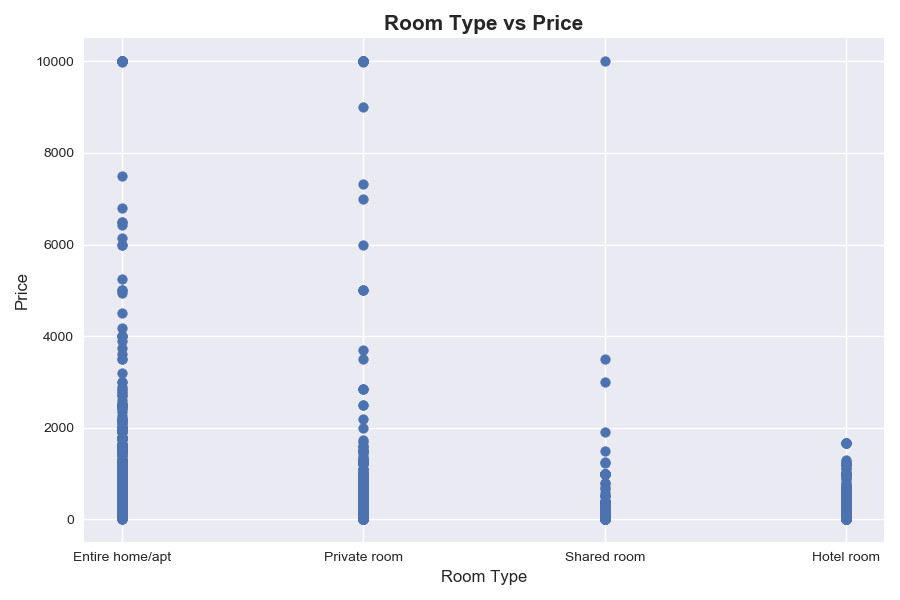

In [10]:
Draw_RoomType_vs_price()